# **Importing Required Python Libraries**

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


# **Load Dataset**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [ ]:
news=pd.read_csv('train.csv')

# **Summarize Data**

In [ ]:
news.shape

(20800, 5)

In [ ]:
news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
news.isna()

,id,title,author,text,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
20795,False,False,False,False,False
20796,False,False,False,False,False
20797,False,False,False,False,False
20798,False,False,False,False,False


In [ ]:
news.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20795    False
20796    False
20797    False
20798    False
20799    False
Length: 20800, dtype: bool

**Feature Names and their Data Types.**

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
news.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


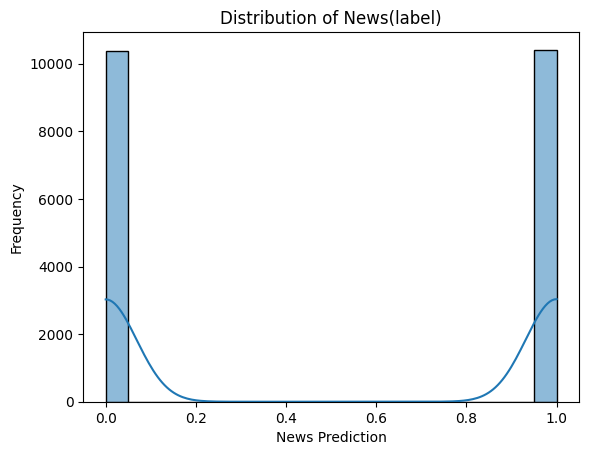

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of News (label)

sns.histplot(news['label'], bins=20, kde=True)
plt.title('Distribution of News(label)')
plt.xlabel('News Prediction')
plt.ylabel('Frequency')
plt.show()

# **Data Splitting**

**Separately storing Categorical and Numerical data in different variables.**

In [ ]:
##Selecting numerical features
numerical_data = news.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 2 numerical features: 

['id', 'label']


In [ ]:
#Selecting categoricalfeatures
categorical_data=news.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 4 categorical features: 

['title', 'author', 'text', 'content']


# **Descriptive Analysis**

**NUMERICAL DATA**

**Summary statistics of Numerical Features**

In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20800.0,10399.500000,6004.587135,0.0,5199.75,10399.5,15599.25,20799.0
label,20800.0,0.500625,0.500012,0.0,0.00,1.0,1.00,1.0


**Variance of each numerical feature**

In [ ]:
numerical_data.var()

id       3.605507e+07
label    2.500116e-01
dtype: float64

**Skew in numerical Features**

In [ ]:
numerical_data.skew()

id       0.0000
label   -0.0025
dtype: float64

**Histograms**

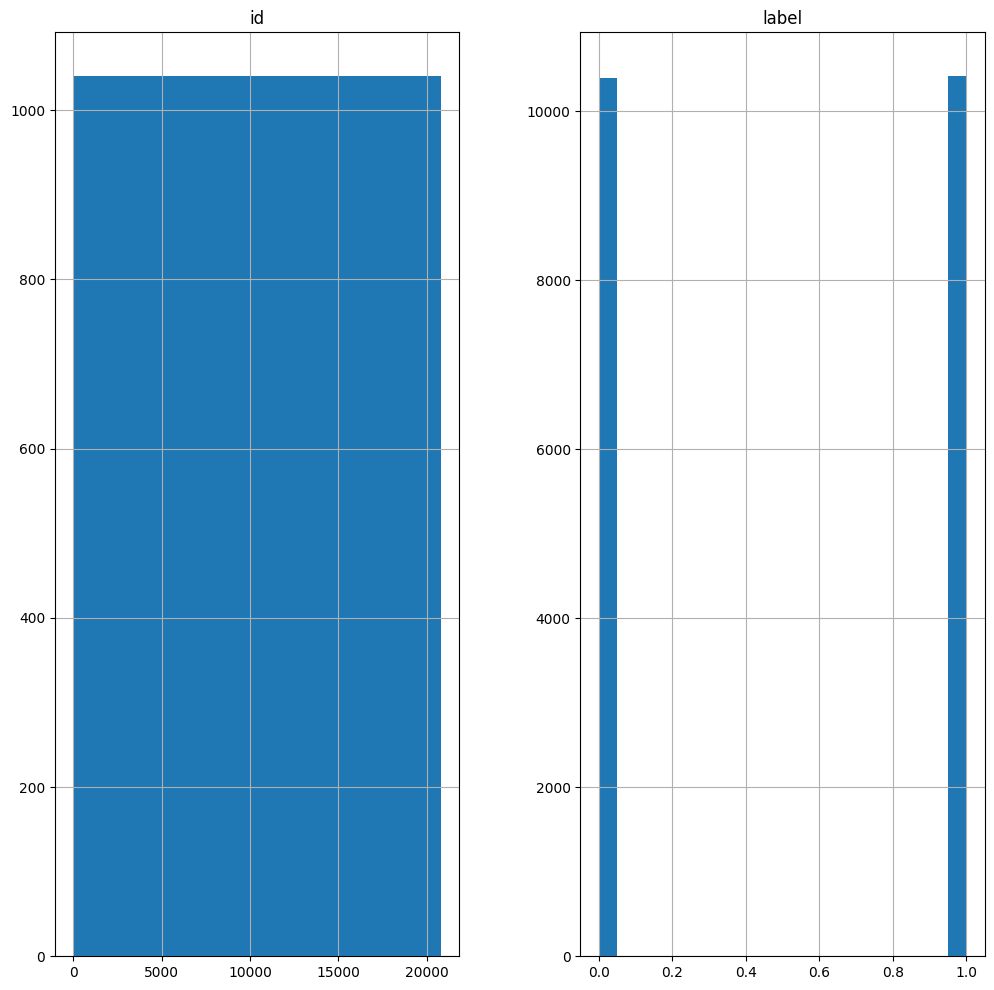

In [ ]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

**Unique Values**

In [ ]:
numerical_data.nunique()

id       20800
label        2
dtype: int64

**Missing Values**

In [ ]:
numerical_data.isnull().sum()

id       0
label    0
dtype: int64

**Boxplot**

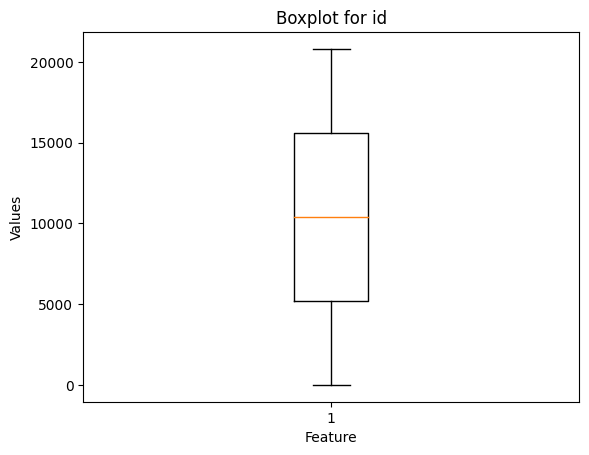

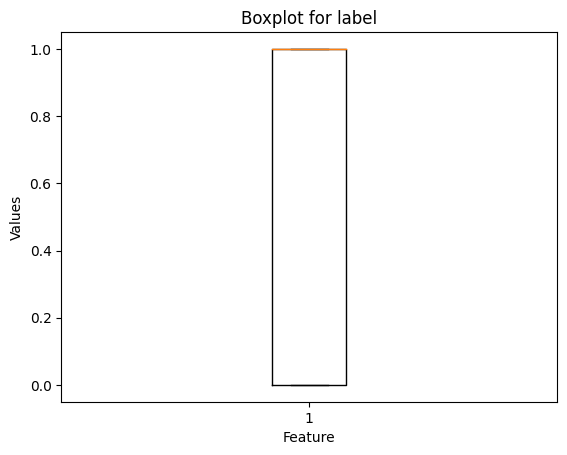

In [ ]:
features = ['id','label']  # List of features

# Create a boxplot for each feature
for feature in features:
    plt.figure()  # Create a new figure for each feature
    plt.boxplot(news[feature])
    plt.title(f'Boxplot for {feature}')
    plt.xlabel('Feature')
    plt.ylabel('Values')



plt.show();

**Correlation**

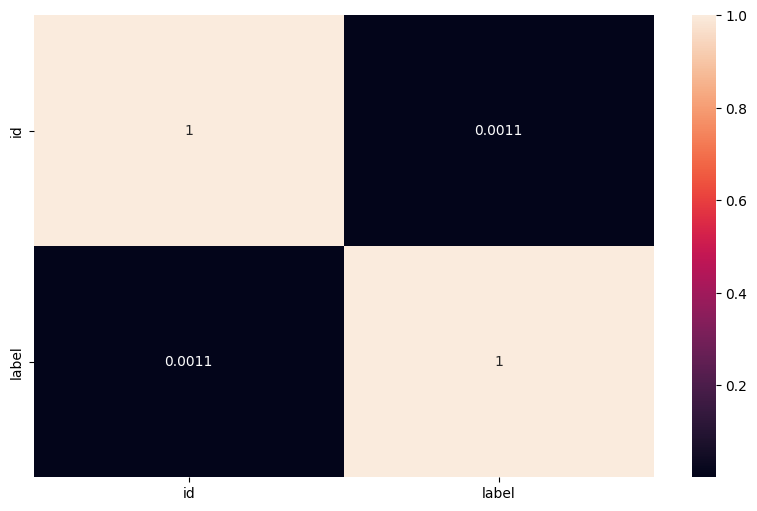

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), ax=ax, annot=True)
plt.show()

**Scatterplot**

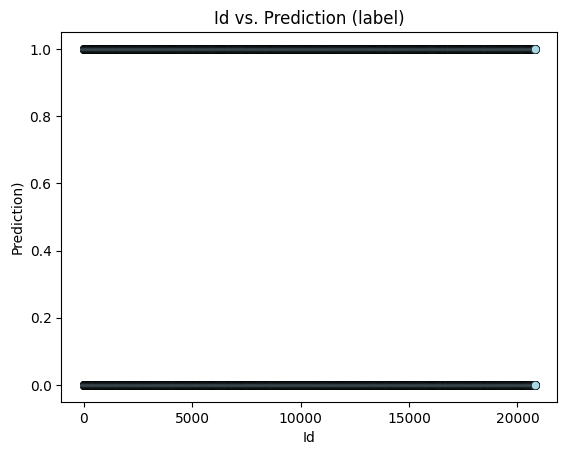

In [ ]:
sns.scatterplot(x='id', y='label', data=news, color='lightblue',edgecolor='black', alpha=0.7)
plt.title('Id vs. Prediction (label)')
plt.xlabel('Id')
plt.ylabel('Prediction)')
plt.show()

**Obeservations**

1.ID contains most of the unique values.

2.Our outcome variable which is LABEL is a binary variable.

3.None of the features contains any missing values so no need for use of any statistical imputations

**CATEGORICAL DATA**

In [ ]:
categorical_data.describe(include='object').T

,count,unique,top,freq
title,20800,19804,,558
author,20800,4202,,1957
text,20800,20386,,114
content,20800,20412,Anonymous,61


**Barplot**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127776 (\N{SHOOTING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


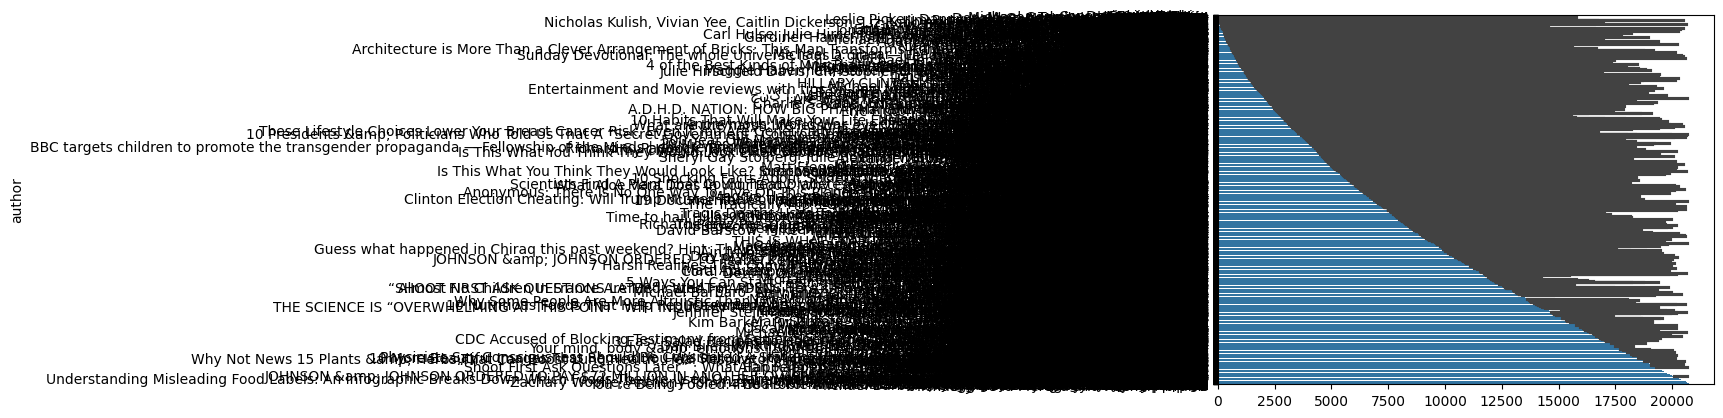

In [ ]:
y=news['label']
sns.barplot(news['author'])
plt.show()

**Scatterplot**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127776 (\N{SHOOTING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


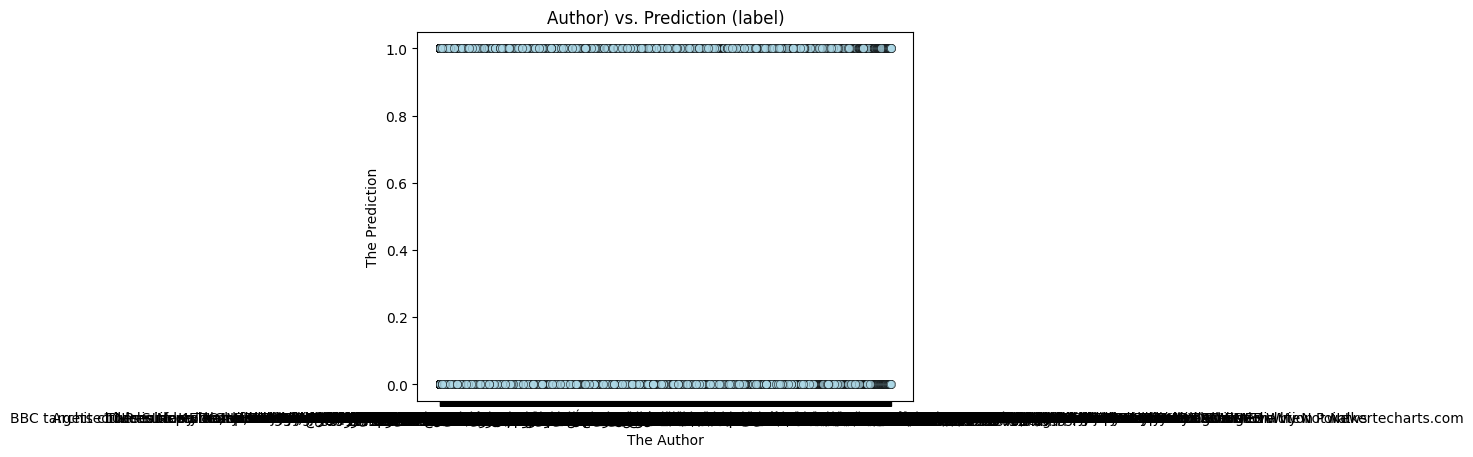

In [ ]:
sns.scatterplot(x='author', y='label', data=news, color='lightblue',edgecolor='black', alpha=0.7)
plt.title('Author) vs. Prediction (label)')
plt.xlabel('The Author')
plt.ylabel('The Prediction')
plt.show()

**Unique Values**

In [ ]:
unique_counts=categorical_data.nunique()

for index,i in enumerate(range(4),start=1):
    print(index,"{a} has {b} unique values".format(a=categorical_features[i],b=unique_counts[i]))

1 title has 19804 unique values
2 author has 4202 unique values
3 text has 20386 unique values
4 content has 20412 unique values


# **Correlation Analysis**

**Correlation Matrix of whole dataset**

In [ ]:
from pandas import set_option
#set_option("precision",3)
correlation=numerical_data.corr(method='pearson')
correlation

,id,label
id,1.00000,0.00114
label,0.00114,1.00000


In [ ]:
correlationn=news.corr
correlationn

<bound method DataFrame.corr of           id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1      Ever get the feeling your life circles the rou...      0   
2      Why the Truth Might Get You Fired October 29, ...      1   
3      Videos 15 Civilians Killed In Single US Airstr...      1   
4      Print \nAn Iranian woman has been sentenced to...      1   
...                                                  ...    ...   
20795  Rapper T. I. unloaded on black celebrities who...      0   
20796  When the Green Bay Packers lost to the Washing...      0   
20797  The Macy’s of today grew from the union of sev...      0   
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1   
20799    David Swanson is an author, activist, journa...      1   

                                                 content  
0      House Dem Aide: We Didn’t Even See Comey’s Let...  
1      FLYNN: Hillary Clinton, Big Woman on Campus - ...  
2      Why the Truth Might Get You Fired Consortiumne...  
3      15 Civilians Killed In Single US Airstrike Hav...  
4      Iranian woman jailed for fictional unpublished...  
...                                                  ...  
20795  Rapper T.I.: Trump a ’Poster Child For White S...  
20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...  
20797  Macy’s Is Said to Receive Takeover Approach by...  
20798  NATO, Russia To Hold Parallel Exercises In Bal...  
20799            What Keeps the F-35 Alive David Swanson  

[20800 rows x 6 columns]>

**Correlation Heatmap of whole dataset**

In [ ]:
# Plot correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(dataset.corr(), ax=ax, annot=True)
plt.show()

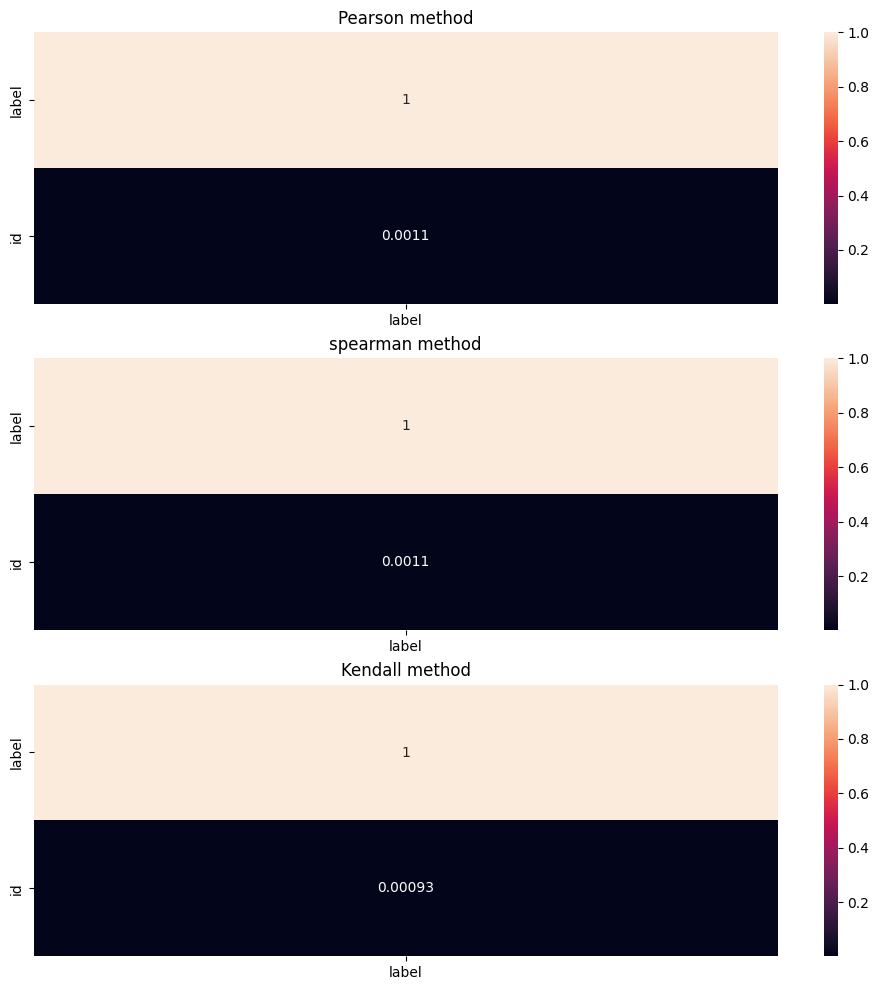

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(12, 12))
## Correlation coefficient using different methods
corr1 = numerical_data.corr('pearson')[['label']].sort_values(by='label', ascending=False)
corr2 = numerical_data.corr('spearman')[['label']].sort_values(by='label', ascending=False)
corr3 = numerical_data.corr('kendall')[['label']].sort_values(by='label', ascending=False)

#setting titles for each plot
ax[0].set_title('Pearson method')
ax[1].set_title('spearman method')
ax[2].set_title('Kendall method')
## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

**Checking Imbalance in Data**

In [ ]:
#check Imbalance in data

#group instances based on the classes in OUTCOME variable
class_counts=news.groupby("label").size()

columns=['label','count','percentage']
outcome=[0,1]
count=list()
percentage=list()

#Calculate the percentage of each value of the OUTCOME variable from total
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/105000)*100
    percentage.append(percent)

# Convert the calulated values into a dataframe
imbalance_df=pd.DataFrame(list(zip(outcome,count,percentage)),columns=columns)
imbalance_df

,label,count,percentage
0,0,10387,9.892381
1,1,10413,9.917143


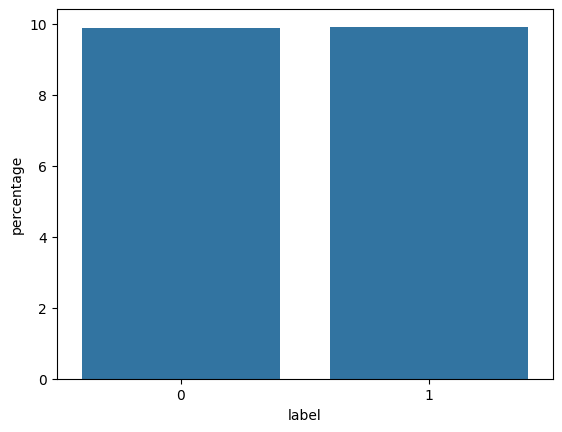

In [ ]:
sns.barplot(data=imbalance_df,x=imbalance_df['label'],y=imbalance_df['percentage'])
plt.show()

**Observations**

Based on the above grouping, It shows that around 9.89% of instances consists LABEL value '0' and 9.91% of instances consists LABEL values '1'

**Density Plots**

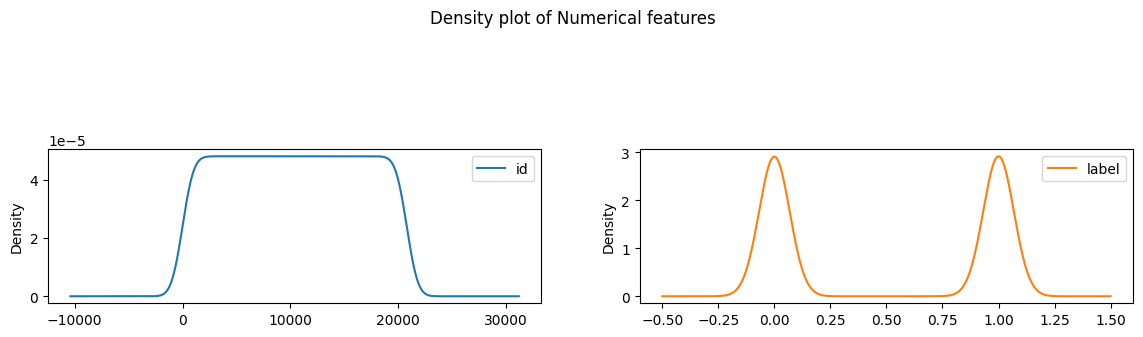

In [ ]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()